# Inteligência artifical aplicada para identificar padrões de Churn em empresas SAAS

Esse é um Case de Ciência de dados com foco no uso de Machine Learning, com o objetivo de encontrar padrões de Churn em uma empresa SAAS

O projeto é divido nas fases esenciais de Análise de dados e para construção de um programa que aprende:
1- Entendimento da empresa e área
2- Extração e obtenção de dados
3- Ajustes de dados/limpeza de dados
4- Análise exploratória
5- Modelagem + algoritmos
6- Interpretação de resultados

1- Entendimento da empresa e área
Trata-se de uma empresa de serviços de Telecom, que utiliza como modelo de negócios o Software com serviços (SAAS), tendo diferentes recorrêcia de pagamentos.

In [36]:
#2- Extração e obtenção de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tabela = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
tabela.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [37]:
#3-Análise de dados - listando as colunas
tabela.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [38]:
#3.1-Análise de dados - listando tipos de dados
tabela.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [39]:
#3.2- Ajustes de dados =>Excluindo colunas desnecessárias para a análise e convertendo colunas Gastos Totais em numérico

tabela.drop(["customerID"], axis=1, inplace=True)
tabela.TotalCharges = pd.to_numeric(tabela.TotalCharges, errors='coerce')
tabela.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [40]:
# 4- Análise exploratória - percentual de cancelamento
print(tabela["Churn"].value_counts())
print(tabela["Churn"].value_counts(normalize=True).map("{:.1%}".format))


No     5174
Yes    1869
Name: Churn, dtype: int64
No     73.5%
Yes    26.5%
Name: Churn, dtype: object


In [41]:
#ajustando as features para facilitar o trabalho do modelo no futuro (features de categoria, sim e não, etc)
tabela.dropna(inplace = True)

tabelacod = tabela.iloc[:,1:]

tabelacod["Churn"].replace(to_replace='Yes', value=1, inplace=True)
tabelacod["Churn"].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
tabela_dummies = pd.get_dummies(tabelacod)
tabela_dummies.head()


SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  Partner_No  \
0              0       1           29.85         29.85      0           0   
1              0      34           56.95       1889.50      0           1   
2              0       2           53.85        108.15      1           1   
3              0      45           42.30       1840.75      0           1   
4              0       2           70.70        151.65      1           1   

   Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  ...  \
0            1              1               0                1  ...   
1            0              1               0                0  ...   
2            0              1               0                0  ...   
3            0              1               0                1  ...   
4            0              1               0                0  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 44 columns]

In [42]:
!pip install plotly

In [43]:
#4.1: Entender as causas - Análise completa/possíveis soluções
import plotly.express as px

# cria gráfico
#para cada coluna da tabela criar um grafico
for coluna in tabela.columns:
    #print(coluna)
    grafico = px.histogram(tabela, x=coluna, color="Churn")

#exibe gráfico
    grafico.show()

<AxesSubplot:>

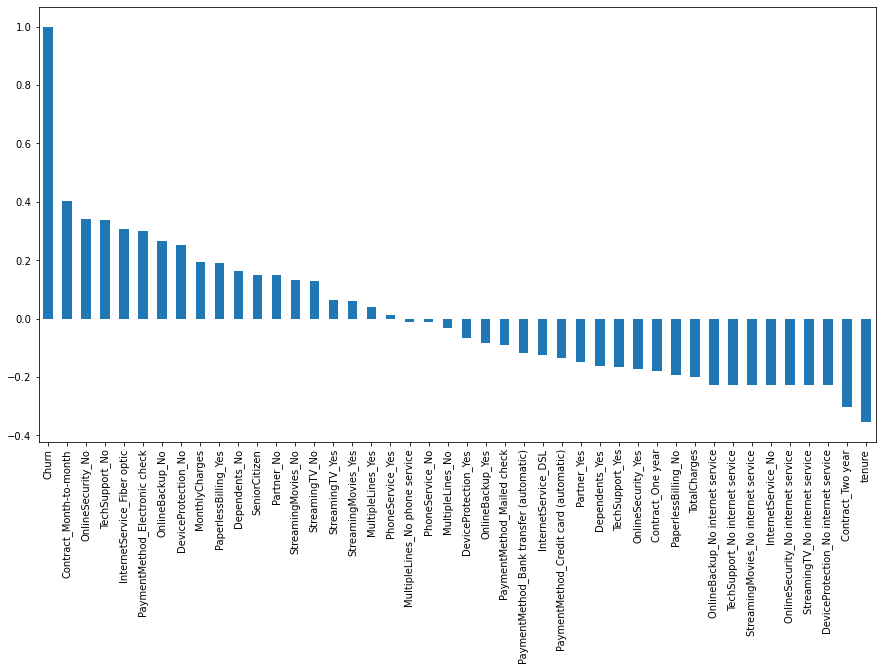

In [44]:
# 4.1.1- Análise exploratória  - correlação entre as features X churn
plt.figure(figsize=(15,8))
tabela_dummies.corr()["Churn"].sort_values(ascending = False).plot(kind='bar')

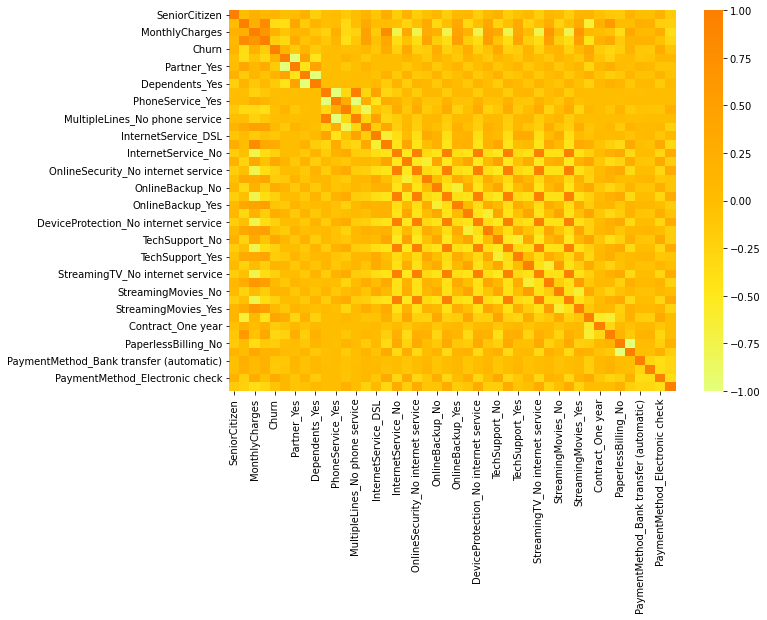

In [45]:
# 4.1.2- Análise exploratória  - correlação entre as features através de Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(tabela_dummies.corr(), annot=False, cmap="Wistia")
plt.show()

In [46]:
#5- Modelagem + algoritmos
#Iniciando a inteligência artificial separando em base de treino e teste
y = tabela_dummies["Churn"]
x = tabela_dummies.drop("Churn", axis = 1)

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [47]:
#criar a inteligência artificial e fazer as previsões utilizando o algoritimo de regressão logística
from sklearn.linear_model import LogisticRegression
modelo_regressaologistica = LogisticRegression()
result = modelo_regressaologistica.fit(x_treino, y_treino)

C:\Users\Positivo\anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [48]:
from sklearn import metrics
previsao_regressaolinear = modelo_regressaologistica.predict(x_teste)
# Print the prediction accuracy
print (metrics.accuracy_score(y_teste, previsao_regressaolinear)) 

0.7985781990521327


In [49]:
#criar a inteligência artificial e fazer as previsões utilizando o algoritimo de árvore de decisão
from sklearn.ensemble import RandomForestClassifier
modelo_arvoredecisao = RandomForestClassifier()
result = modelo_arvoredecisao.fit(x_treino, y_treino)

In [50]:
from sklearn import metrics
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
# Print the prediction accuracy
print (metrics.accuracy_score(y_teste, previsao_arvoredecisao))

0.7824644549763033


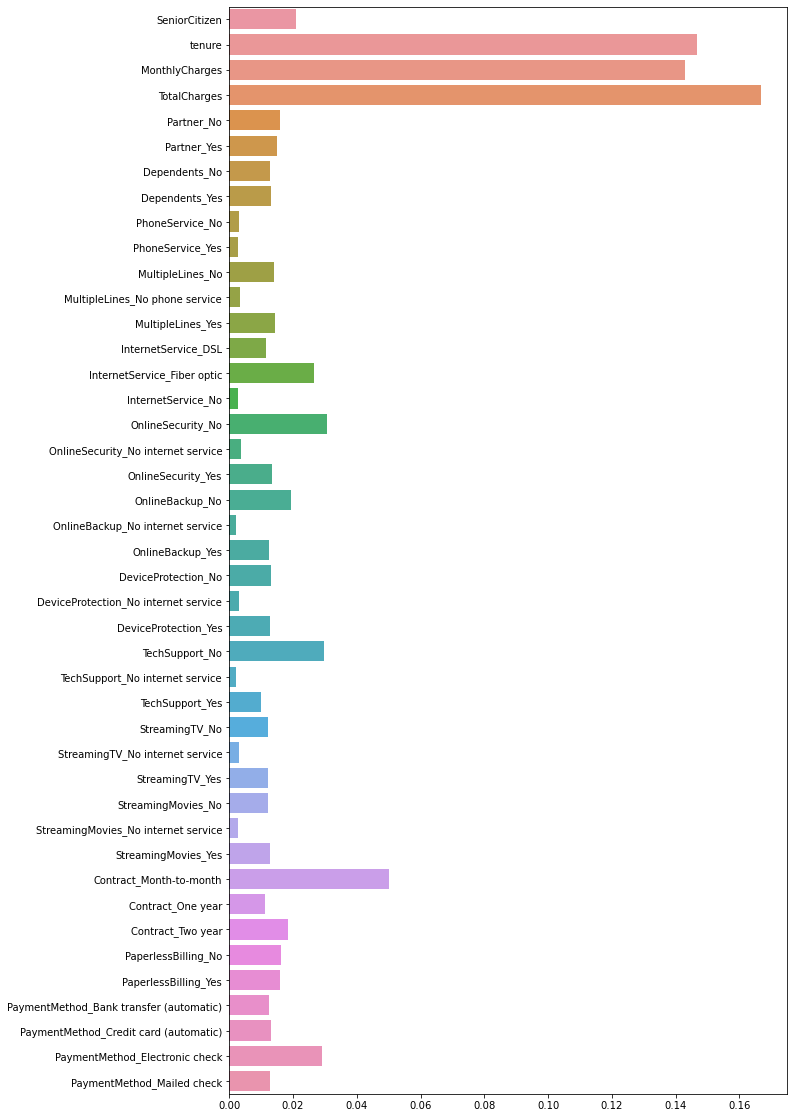

In [51]:
#Importância de cada variável para o churn
plt.figure(figsize=(10, 20))
sns.barplot(y=x_treino.columns, x=modelo_arvoredecisao.feature_importances_)
plt.show()

# Conclusão:
Podemos observar que após a aplicação do algoritimo que as features TotalCharges, MontlyCharges, Tenure e SeniorCitizen continuaram a impactar diretamente na ocorrência do Churn